In [169]:
import pandas as pd
import numpy as np

In [170]:
df = pd.read_csv("laptop_data.csv")
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [172]:
df.shape

(1303, 12)

In [173]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [174]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [175]:
df.duplicated().sum()

0

In [176]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [177]:
df["Ram"] = df["Ram"].str.replace("GB","")
df["Weight"] = df["Weight"].str.replace("kg","")
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [178]:
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float32")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

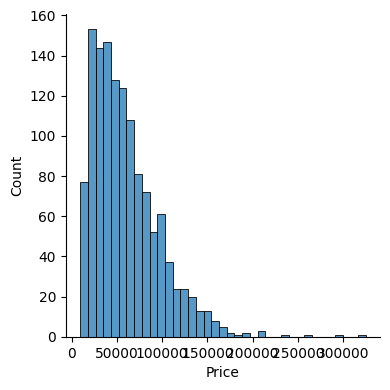

In [180]:
sns.displot(df["Price"],height=4)

<Axes: xlabel='Company'>

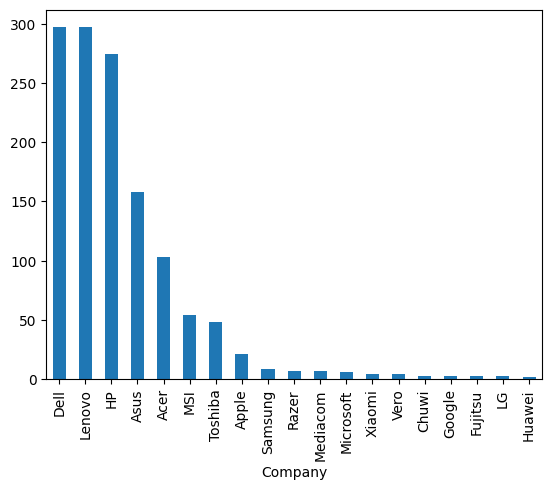

In [181]:
df["Company"].value_counts().plot(kind="bar")

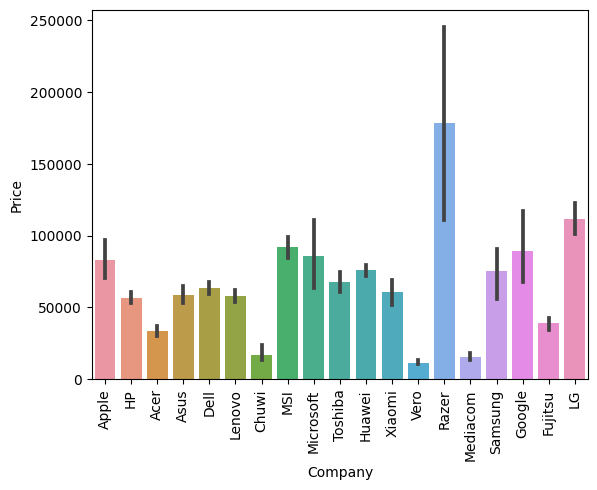

In [182]:
sns.barplot(x = df["Company"],y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='TypeName'>

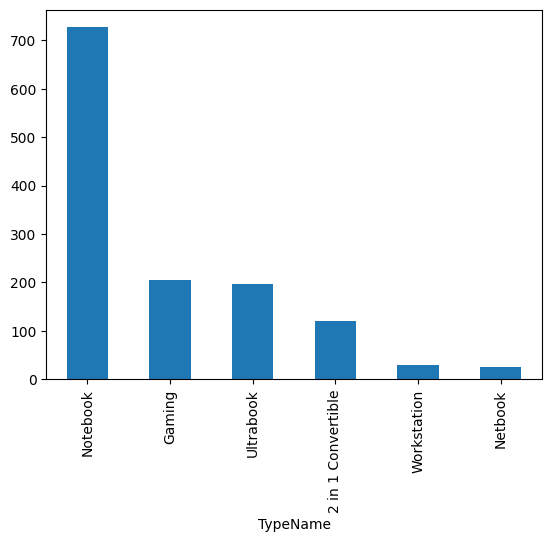

In [183]:
df["TypeName"].value_counts().plot(kind="bar")

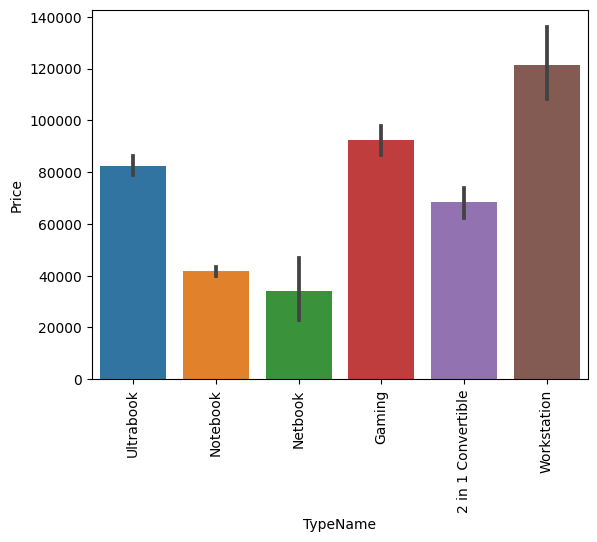

In [184]:
sns.barplot(x = df["TypeName"],y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [185]:
numerical_cols = ['Inches', 'Ram', 'Weight', 'Price']

# Categorical Summary
categorical_cols = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']

In [186]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Company: 19 unique values
TypeName: 6 unique values
ScreenResolution: 40 unique values
Cpu: 118 unique values
Gpu: 110 unique values
OpSys: 9 unique values


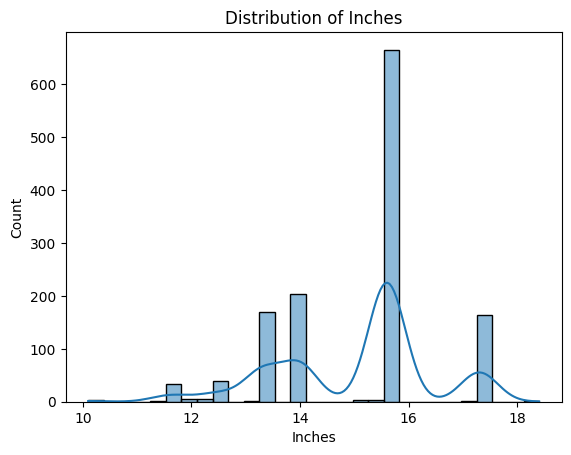

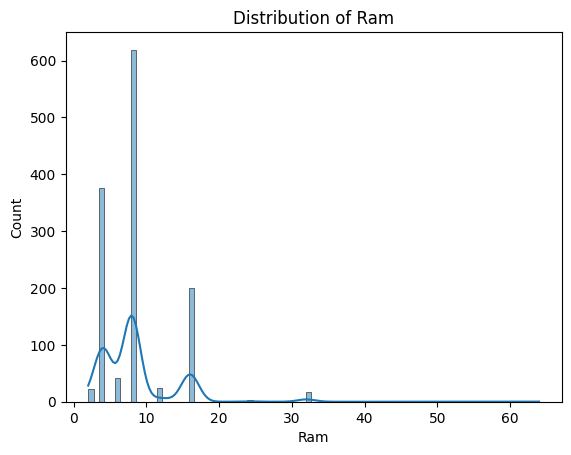

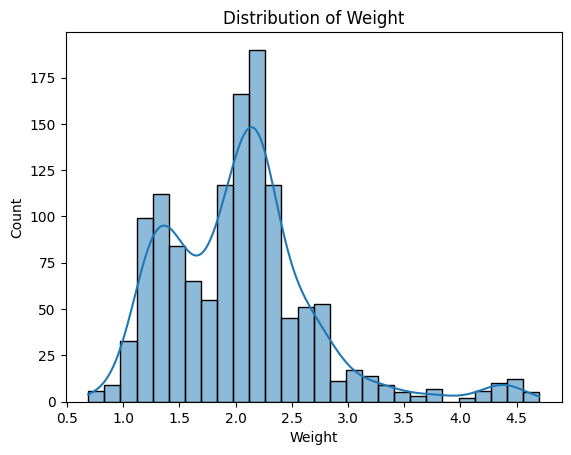

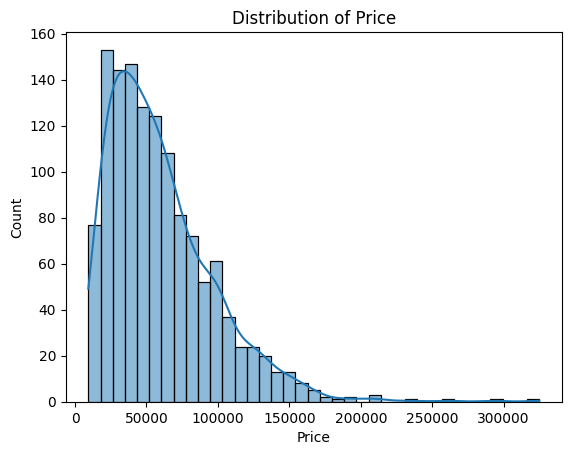

In [187]:
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [188]:
df["Touchscreen"] =df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0)

In [189]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
595,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.29,24455.52,0
1027,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.95,56476.80,0
1006,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,64202.40,0
909,LG,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,101178.72,1
1255,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.00,18061.92,0


In [190]:
df["Touchscreen"].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

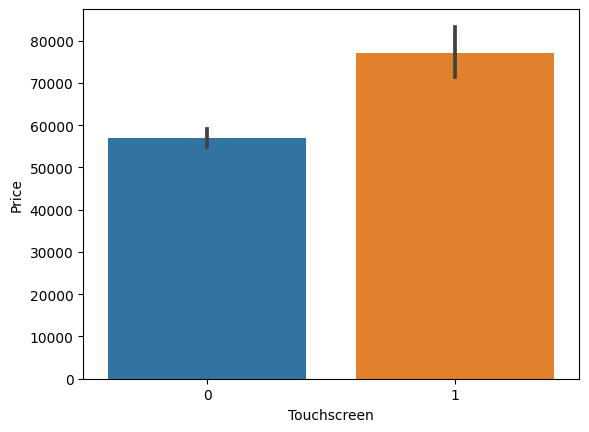

In [191]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [192]:
df["IPS"]=df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0 )
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


In [193]:
df["IPS"].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

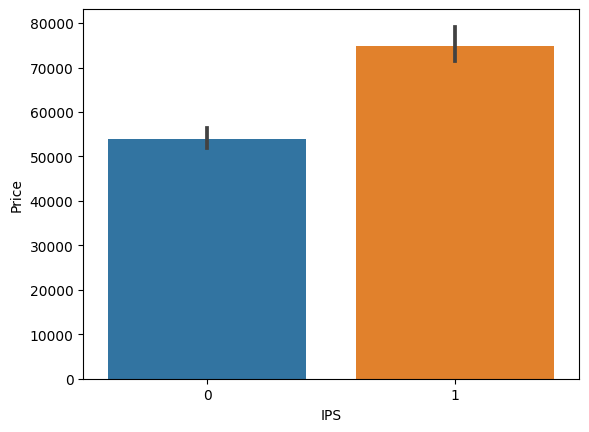

In [194]:
sns.barplot(x=df["IPS"],y=df["Price"])

In [195]:
# Extract X_res and Y_res from ScreenResolution
df['X_res'] = df['ScreenResolution'].str.split('x').str[0].str.strip()
df['Y_res'] = df['ScreenResolution'].str.split('x').str[1].str.strip()

# Convert X_res and Y_res to numeric (optional)
# df['X_res'] = pd.to_numeric(df['X_res'])
# df['Y_res'] = pd.to_numeric(df['Y_res'])

# Print the modified DataFrame
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [196]:
df["X_res"] = df["X_res"].str.replace(",",'').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [197]:
df["X_res"]=df["X_res"].astype("int32")
df["Y_res"] = df["Y_res"].astype("int32")

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [199]:
numeric_columns = ['Inches', 'Ram', 'Price','Touchscreen','IPS','X_res','Y_res']
correlation_matrix = df[numeric_columns].corr()['Price']
correlation_matrix

Inches         0.068197
Ram            0.743007
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [200]:
df["PPi"]=(((df['X_res']**2) + (df["Y_res"]**2)) **0.5/ df["Inches"]).astype("float")

In [201]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [202]:
df.drop(columns=["ScreenResolution","Inches","X_res","Y_res"],axis=1,inplace=True)

In [203]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005


In [204]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [205]:
df["Cpu Name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[:3]))

In [206]:
def prosessor(text):
    if text == "Intel Core i5" or text =="Intel Core i7"or text =="Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other intel prosessor"
        else:
            return "AMD Processor"

In [207]:
df['CPU Brand'] = df["Cpu Name"].apply(prosessor)

In [208]:
df["CPU Brand"].value_counts()

CPU Brand
Intel Core i7            527
Intel Core i5            423
Other intel prosessor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='CPU Brand'>

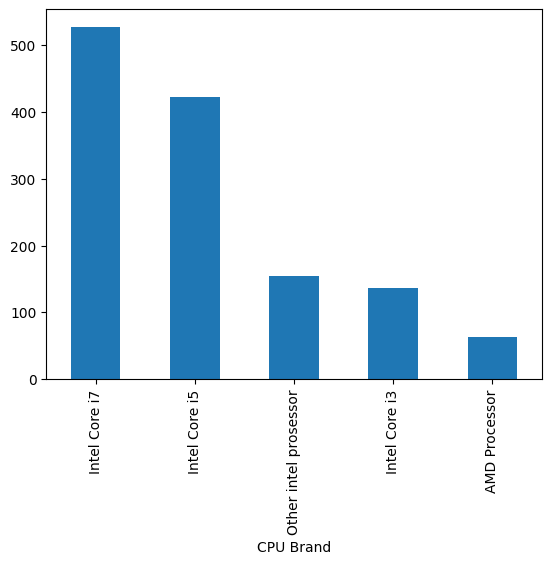

In [209]:
df["CPU Brand"].value_counts().plot(kind="bar")

<Axes: xlabel='CPU Brand', ylabel='Price'>

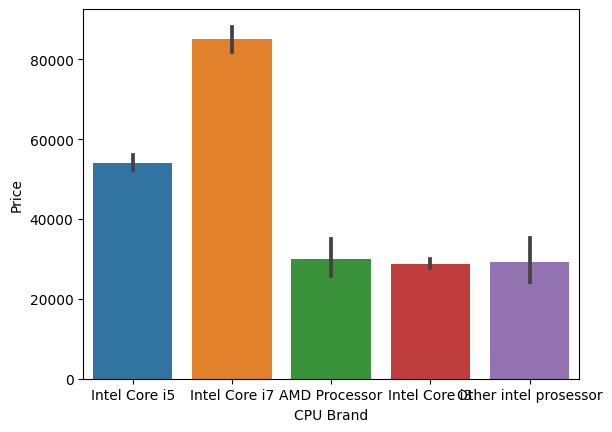

In [210]:
sns.barplot(x=df['CPU Brand'],y=df["Price"])

In [211]:
df.drop(columns=["Cpu Name", "Cpu"])

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPi,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other intel prosessor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


In [212]:
df.sample(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPi,Cpu Name,CPU Brand
1273,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,100.454670,Intel Core i7,Intel Core i7
56,HP,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.91,23389.92,0,0,141.211998,Intel Core i3,Intel Core i3


In [213]:
# Create new columns with extracted values from 'Memory'
df['SSD'] = df['Memory'].str.extract(r'(\d+)GB SSD').astype(float).fillna(0)
df['HDD'] = df['Memory'].str.extract(r'(\d+)TB HDD').astype(float).fillna(0) * 1000  # Convert TB to GB
df['Hybrid'] = df['Memory'].str.extract(r'(\d+)GB Hybrid').astype(float).fillna(0)
df['Flash'] = df['Memory'].str.extract(r'(\d+)GB Flash').astype(float).fillna(0)

# Print the modified DataFrame


In [214]:
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPi,Cpu Name,CPU Brand,SSD,HDD,Hybrid,Flash
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,128.0,0.0,0.0,0.0


In [215]:
df["HDD"].value_counts()

HDD
0.0       864
1000.0    408
2000.0     31
Name: count, dtype: int64

In [216]:
print(df["SSD"].value_counts())


SSD
256.0    500
0.0      476
128.0    172
512.0    138
32.0       6
180.0      5
16.0       3
64.0       1
240.0      1
8.0        1
Name: count, dtype: int64


In [217]:
numeric_columns = [ 'Ram', 'Price','Touchscreen','IPS','SSD',"HDD","Hybrid","Flash"]
correlation_matrix = df[numeric_columns].corr()['Price']
correlation_matrix

Ram            0.743007
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
SSD            0.552890
HDD           -0.024708
Hybrid        -0.004826
Flash         -0.040511
Name: Price, dtype: float64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  PPi          1303 non-null   float64
 12  Cpu Name     1303 non-null   object 
 13  CPU Brand    1303 non-null   object 
 14  SSD          1303 non-null   float64
 15  HDD          1303 non-null   float64
 16  Hybrid       1303 non-null   float64
 17  Flash        1303 non-null   float64
dtypes: float32(1), float64(6), int32(1), int64(2), o

In [219]:
df.drop(columns=["Hybrid","Flash","Memory","Cpu Name"],inplace=True)


In [220]:
df.head(1)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128.0,0.0


In [221]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [222]:
df['GPU Brand'] = df["Gpu"].apply(lambda x:x.split()[0])
df.head(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD,GPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128.0,0.0,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256.0,0.0,Intel


In [223]:
df["GPU Brand"].value_counts()

GPU Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [224]:
df = df[df["GPU Brand"] != "ARM"]

<Axes: xlabel='GPU Brand', ylabel='Price'>

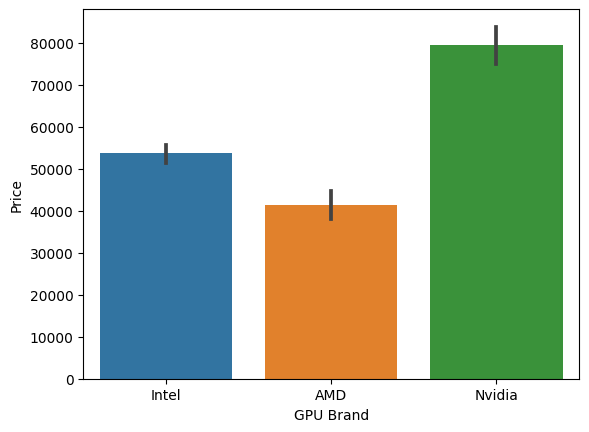

In [225]:
sns.barplot(x=df["GPU Brand"],y = df["Price"])

In [226]:
df.drop(columns=["Gpu",'Cpu'],inplace=True)


In [227]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD,GPU Brand
274,Toshiba,Notebook,8,Windows 10,2.20,43263.3600,0,0,100.454670,Intel Core i7,0.0,0.0,Nvidia
6,Apple,Ultrabook,16,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0.0,0.0,Intel
1067,Dell,2 in 1 Convertible,8,Windows 10,1.62,42517.9728,1,0,165.632118,Intel Core i7,256.0,0.0,Intel
31,Asus,Notebook,2,Windows 10,1.65,10602.7200,0,0,111.935204,AMD Processor,0.0,0.0,AMD
1146,HP,Ultrabook,8,Windows 7,1.26,122381.4960,0,0,176.232574,Intel Core i7,256.0,0.0,Intel


In [228]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='OpSys', ylabel='Price'>

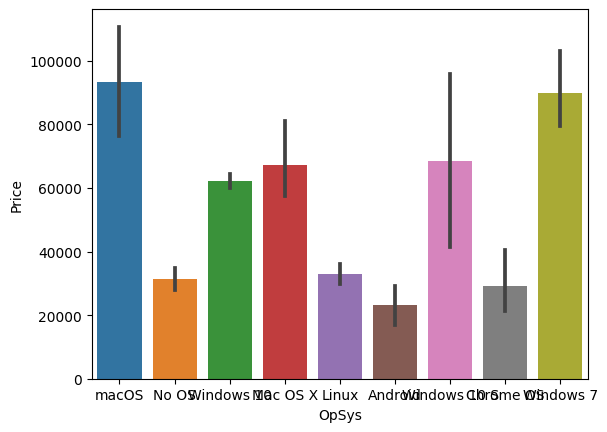

In [229]:
sns.barplot(x=df["OpSys"],y=df["Price"])

In [230]:
def cat_os(input):
    if input == "Windows 10" or input == "Windows 7" or input =="Windows 10 S":
        return "Windows"
    elif input=="Mac OS X" or input == "macOS":
        return "Mac"
    else:
        return "No OS/Linux/Others"

In [231]:
df["OS"]=df["OpSys"].apply(cat_os)

In [232]:
df.drop(columns=['OpSys'],inplace=True)

In [233]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128.0,0.0,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

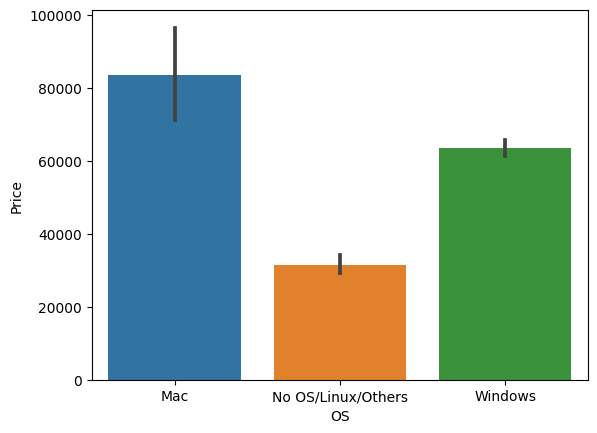

In [234]:
sns.barplot(x=df["OS"],y= df["Price"])

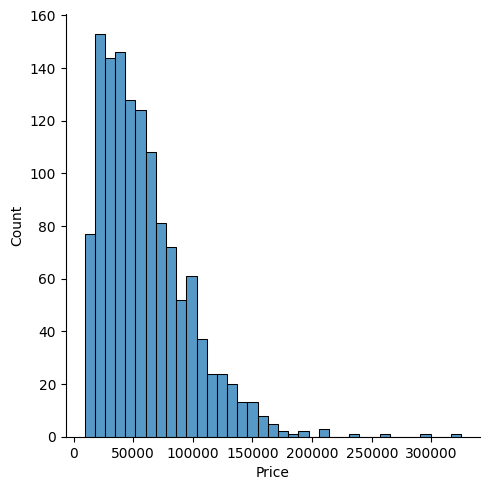

In [235]:
sns.displot(df["Price"])

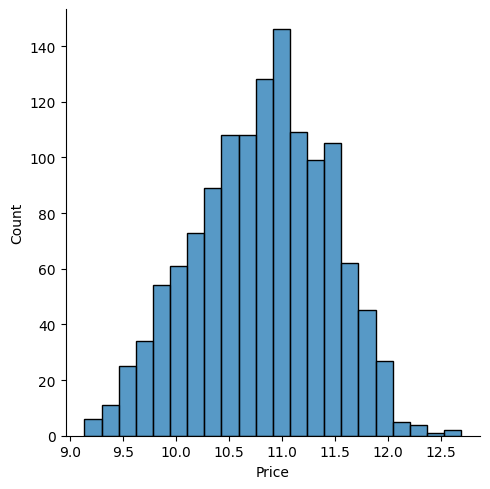

In [236]:
sns.displot(np.log( df["Price"]))

In [237]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD,GPU Brand,OS
121,MSI,Gaming,16,1.80,119427.1200,0,0,141.211998,Intel Core i7,256.0,2000.0,Nvidia,Windows
877,Xiaomi,Ultrabook,8,1.28,49816.8000,0,1,165.632118,Intel Core i5,256.0,0.0,Nvidia,Windows
1055,HP,Notebook,4,2.31,37570.3920,0,0,100.454670,Intel Core i3,0.0,0.0,Intel,Windows
160,Asus,Notebook,4,2.03,21471.8400,0,0,100.454670,AMD Processor,0.0,1000.0,AMD,Windows
97,Dell,Notebook,4,2.20,25840.8000,0,0,141.211998,Intel Core i3,256.0,0.0,AMD,No OS/Linux/Others
898,Dell,Notebook,4,2.18,32713.9200,0,0,100.454670,Intel Core i3,0.0,1000.0,AMD,Windows
366,Dell,Notebook,8,2.80,57808.8000,0,0,127.335675,Intel Core i5,128.0,1000.0,AMD,Windows
951,Dell,Ultrabook,8,1.36,94572.0000,0,0,157.350512,Intel Core i7,256.0,0.0,Intel,Windows
338,Asus,Notebook,4,2.00,14651.4672,0,0,100.454670,Other intel prosessor,0.0,1000.0,Intel,No OS/Linux/Others
1279,Lenovo,Notebook,8,2.60,47898.7200,0,1,141.211998,Intel Core i7,0.0,1000.0,Nvidia,Windows


In [238]:
X  = df.drop(columns=["Price"])
y = np.log(df["Price"])

In [239]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256.0,0.0,Intel,No OS/Linux/Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256.0,0.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128.0,0.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512.0,0.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other intel prosessor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0.0,1000.0,AMD,Windows


In [240]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [242]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPi,CPU Brand,SSD,HDD,GPU Brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128.0,0.0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,128.0,1000.0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other intel prosessor,0.0,0.0,Intel,No OS/Linux/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0.0,1000.0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,128.0,1000.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,512.0,0.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,0.0,1000.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0.0,2000.0,Nvidia,No OS/Linux/Others


In [243]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [244]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()
pipe = Pipeline([
    ('step1',step1),
    ("step2",step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 scoee",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 scoee 0.8082561540465092
MAE 0.21153302276499902


c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [245]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=5)
pipe = Pipeline([
    ('step1',step1),
    ("step2",step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 scoee",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 scoee 0.812371241371904
MAE 0.21070115743208445


c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [246]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)
pipe = Pipeline([
    ('step1',step1),
    ("step2",step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 scoee",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 scoee 0.807647632091404
MAE 0.21257323251179233


c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [247]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=9)
pipe = Pipeline([
    ('step1',step1),
    ("step2",step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 scoee",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

R2 scoee 0.844856266891238
MAE 0.1826406608230877


c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [252]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor()
pipe = Pipeline([
    ('step1',step1),
    ("step2",step2)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print("R2 scoee",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))

c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 scoee 0.8807898010238085
MAE 0.15892568314138034


In [249]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.8709041226180451
MAE 0.15982895755849214


c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [250]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression, Ridge
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_absolute_error

# # Load your dataset
# # df = pd.read_csv('your_dataframe.csv')  # Replace 'your_dataframe.csv' with the actual file path

# # Split the data into features (X) and target variable (y)
# X = df.drop(columns=['Price'])
# y = df['Price']

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a function to test different algorithms
# def test_algorithm(algorithm_name, algorithm, X_train, y_train, X_test, y_test):
#     step1 = ColumnTransformer(transformers=[
#         ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
#     ], remainder='passthrough')

#     pipe = Pipeline([
#         ('step1', step1),
#         ("step2", algorithm)
#     ])

#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
    
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
    
#     print(f"{algorithm_name} Metrics:")
#     print(f"R2 Score: {r2}")
#     # print(f"MAE: {mae}")
#     print("\n")

# # Test different algorithms
# algorithms = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=5),
#     "lasso" : Lasso(alpha=0.001),
#     "Random Forest Regressor": RandomForestRegressor(),
#     "Decision Tree Regressor" :DecisionTreeRegressor(max_depth=9)
# }

# for name, algorithm in algorithms.items():
#     print(f"Testing {name}:")
#     test_algorithm(name, algorithm, X_train, y_train, X_test, y_test)


In [251]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))